# TP-2 Organización de Datos

# Oh La La... Data!

* **Hamma AALI CHTOUKI** --- *Padrón 106607 - Alumno regular de intercambio.*  
* **Aymeryc COUSAERT** ------  *Padrón 105464 - Alumno regular de intercambio.*
* **Mariana VINYOLAS**  ---------  *Alumna oyente.*

<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section2'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 2: Import de librerias </h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->



In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns


import re
import nltk.corpus
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as catb
import lightgbm as lgbm

import scikitplot as skplt
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

C:\anaconda\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section3'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 3: Feature engineering</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [5]:

df = train
df['text'] = df['text'].str.lower()   # pasamos a lowercase
df = df.drop(['id', 'location'], axis=1)

In [6]:
df.sample(8)

,keyword,text,target
2100,death,i liked a @youtube video from @jeromekem http:...,0
7418,wounded,police officer wounded suspect dead after exch...,1
4228,hazardous,jkl issues hazardous weather outlook (hwo) ht...,1
2023,danger,@blizzheroes @dustinbrowder dad. i won't chase...,0
7415,wounded,descriptions of 'wounded cats being 'exciting'...,0
5022,mudslide,flood and mudslide warning for east fjords | i...,1
6581,survivors,as anniversary nears atomic bomb survivors spe...,1
7374,windstorm,one thing i wanna see before i die&gt; #trump ...,0


#### Generamos nuevas features sobre el texto

In [7]:
# generamos una columna que indica la cantidad de links a  enlaces externos
df['link'] = df['text'].apply(lambda x: x.count('http'))

# generamos una columna que indica la cantidad de referencias a otras cuentas de twitter
df['contact'] = df['text'].apply(lambda x: x.count('@'))

# generamos una columna que indica la cantidad de hashtags
df['hashtag'] = df['text'].apply(lambda x: x.count('#'))

# generamos una columna que indica la cantidad de digitos
df['numerics'] = df['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

# calculamos la longitud del tweet andes de limpiar
df['length'] = df['text'].str.len()

In [8]:
# calculamos la cantidad de palabras antes de limpiar
def count_words(text):
    '''
    Funcion que toma un texto y devuelve la cantidad de palabras
    '''
    word_counts = len(text.split(' '))
    return word_counts

df['words'] = df['text'].apply(count_words)

In [9]:
# limpiamos el texto eliminando urls, cuentas, hashtags y numeros

def clean_str(string):
    string = re.sub(r'https?\://\S+', '', string)
    string = re.sub(r'http?\://\S+', '', string)
    string = re.sub(r'@\w*\s', '', string)
    string = re.sub(r'#\w*\s', '', string)
    string = re.sub(r'\d', '', string)
    return string

df['text_clean'] = df['text'].apply(lambda x: clean_str(str(x)))

In [10]:
df.sample(5)

,keyword,text,target,link,contact,hashtag,numerics,length,words,text_clean
4856,mass%20murderer,.@libertygeek83 something about kissing the as...,0,1,2,0,0,139,20,.something about kissing the ass of mass murde...
614,bioterrorism,@cagov if 90blks&amp;8whts colluded 2 take wht...,1,0,3,0,1,151,22,if blks&amp;whts colluded take wht f auth hos...
2583,destroyed,hero you can 't swim lonely guy help me my sol...,0,1,0,0,0,137,23,hero you can 't swim lonely guy help me my sol...
1544,chemical%20emergency,@pjcoyle ... need to be included in emergency ...,0,1,1,0,0,107,15,... need to be included in emergency planning ...
3708,fear,@luzukokoti it's all about understanding umnt...,0,0,1,0,0,140,27,it's all about understanding umntu wakho. if ...


<!-- ![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
<a id='section4'></a>

<div style="border-bottom:3px solid #000;"> 
<div align="left"><h2>Step 4: NLP</h2></div>
<div align="right">(return to <a href='#top1'><b>Top</b></a>)</div>
</div> -->

In [11]:
# eliminamos stopwords

stop = stopwords.words('english')

df['text_clean'] = df['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [12]:
# eliminamos signos de puntuacion y caracteres especiales
df['text_clean'] = df['text_clean'].str.replace('[^\w\s]','')

In [13]:
df['word_tokenize'] = df['text_clean'].apply(lambda x: word_tokenize(x))

In [14]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [15]:
# unificamos palabras que poseen la misma raiz aplicando la funcion word_lematizer
df['word_lemmatizer'] = df['word_tokenize'].apply(lambda x: word_lemmatizer(x))

In [16]:
# unificamos la lista de tokens para poder analizar el texto limpio
df['text_clean'] = df['word_lemmatizer'].str.join(' ')

In [17]:
# calculamos nuevamente la longuitud, pero ahora del texto limpio                       
df['length-clean'] = df['text_clean'].str.len()

In [18]:
df['words_clean'] = df['text_clean'].apply(count_words)

In [19]:
pd.set_option('display.max_colwidth', 150)  

In [20]:
df[['text', 'text_clean']].sample(10)

,text,text_clean
5175,meek mill begging nicki minaj to let him obliterate... #ovofest #nowplaying http://t.co/xomi4zqzgp http://t.co/0m1tw3datd,meek mill begging nicki minaj let obliterate
2245,#glimpses: hyderabad deluged by heavy rainfall | http://t.co/dctv1ujlhc http://t.co/qox1jnqsau,glimpse hyderabad deluged heavy rainfall
435,@_doofus_ @diamorfiend im jokin still cant be on moves:/,im jokin still cant move
5749,@dani_riot keep an eye out we'll be looking for lots of new team members in coming days/weeks :),keep eye well looking lot new team member coming daysweeks
1917,@michelleellle ?? shut up freshman its past ur curfew. u need some sleep!! u spend too much of ur time watching tv instead of going outside ??,shut freshman past ur curfew u need sleep u spend much ur time watching tv instead going outside
1204,i'm mentally preparing myself for a bomb ass school year if it's not i'm burning buildings ??,im mentally preparing bomb as school year im burning building
5233,alhaji putin is far from being a good person sha. at least i had front row seat to his complete obliteration of ibeto cement a competitor.,alhaji putin far good person sha least front row seat complete obliteration ibeto cement competitor
3756,fire meet gasoline always gotta get played twice lol,fire meet gasoline always got ta get played twice lol
1511,@myvintagesoul ...of the british upper class and his manservant. the pampered wealthy brit causes a catastrophic shift (reversal) of...,of british upper class manservant pampered wealthy brit cause catastrophic shift reversal of
469,@caixxum5sos thanks for the damn heart attack,thanks damn heart attack


In [21]:
df['keyword'] = df.keyword.str.replace('%20', '_')
df['keyword'] = df.keyword.str.lower()

In [22]:
df.sample(3)

,keyword,text,target,link,contact,hashtag,numerics,length,words,text_clean,word_tokenize,word_lemmatizer,length-clean,words_clean
5492,quarantine,reddit will now quarantine offensiveåêcontent http://t.co/gllawb2fsk http://t.co/3kaafuoztc,0,2,0,0,0,91,7,reddit quarantine offensiveåêcontent,"[reddit, quarantine, offensiveåêcontent]","[reddit, quarantine, offensiveåêcontent]",36,3
7508,wreckage,mh370 victim's family furious the media was told about wreckage confirmation first http://t.co/carmqivkwu,1,1,0,0,0,105,13,mh victim family furious medium told wreckage confirmation first,"[mh, victims, family, furious, media, told, wreckage, confirmation, first]","[mh, victim, family, furious, medium, told, wreckage, confirmation, first]",64,9
7250,weapons,death certificates safes weapons and teslas: def con 23 #security http://t.co/kmdqm3nlns,0,1,0,1,1,88,11,death certificate safe weapon tesla def con,"[death, certificates, safes, weapons, teslas, def, con]","[death, certificate, safe, weapon, tesla, def, con]",43,7


## TF- IDF

In [23]:
# aplicamos TF-IDF seteando un maximo de 1500 palabras
tfidf = TfidfVectorizer(max_features=3000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))


train_vect = tfidf.fit_transform(df['text_clean'])                                             

# lo pasamos a dataframe
df_tf_idf = pd.DataFrame(data = train_vect.todense(), columns = tfidf.get_feature_names())

In [24]:
df_tf_idf.shape

(7613, 3000)

In [25]:
df_tf_idf['target'].value_counts()

0.000000    7602
0.429356       2
0.769954       1
0.388684       1
0.299713       1
0.475567       1
0.485785       1
0.322396       1
0.393383       1
0.513594       1
0.505373       1
Name: target, dtype: int64

In [26]:
df_tf_idf.head()

,__,aba,abandoned,abbswinston,abc,ability,ablaze,able,abortion,absolutely,...,åê,û_,ûextremely,ûpolitics,ûïa,ûïthe,ûïwe,ûïwhen,ûò,ûó
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_tf_idf['target'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [28]:
# como existe la columna target en el analisis tf-idf, la modifico para hacer el concat con 'target' y que no se duplique
df_tf_idf['targ'] = df_tf_idf['target']
df_tf_idf = df_tf_idf.drop(['target'], axis=1)

Para no perder tantos registros, vamos a dejar de lado por ahora la columna ``keyword`` 

In [29]:
df['target'].value_counts()  # chequeamos si los labels estan balanceados

0    4342
1    3271
Name: target, dtype: int64

In [30]:
# eliminamos col que contienen texto y conservamos unicamente las numericas
df_num = df.drop([ 'keyword', 'text', 'text_clean', 'word_tokenize', 'word_lemmatizer'], axis=1)

In [31]:
df_train = pd.concat([df_num, df_tf_idf], axis=1)  # revisar porque aparecen dos columnas llamadas target

In [32]:
df_train.shape

(7613, 3009)

## Train Test Split

In [33]:
# separamos el target del resto de los features

y = df_train.target    
X = df_train.drop('target', axis=1)

In [34]:
X.shape, y.shape

((7613, 3008), (7613,))

In [35]:
# hacemos division entre train y test para cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)      

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5329, 3008), (2284, 3008), (5329,), (2284,))

In [36]:
# estandarizamos las features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test) 

In [37]:
# definimos una 
cv = StratifiedKFold(n_splits=5, random_state=27, shuffle=True)

## XGBoost

In [38]:
model_xgb = xgb.XGBClassifier(n_jobs=-1, random_state=27)

In [39]:
parameters = {
     "eta"    : [0.05 ] ,
     "max_depth"        : [ 15, 20],
     "min_child_weight" : [ 1, 3, 5 ],
     "gamma"            : [  0.1, 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3,  0.5 , 0.7 ]
     }


xgb_cv = RandomizedSearchCV(model_xgb, parameters,cv=cv, n_iter=25, verbose=True, scoring='neg_log_loss', random_state=27)

In [40]:
%%time
xgb_cv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 142.6min finished


Wall time: 2h 23min 24s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=27, shuffle=True),
                   error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='bin...
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecat

In [41]:
xgb_cv.best_params_

{'min_child_weight': 1,
 'max_depth': 20,
 'gamma': 0.3,
 'eta': 0.05,
 'colsample_bytree': 0.3}

In [42]:
y_predicted_xgb = xgb_cv.predict_proba(X_test)

In [43]:
y_pred_xgb = xgb_cv.predict(X_test)

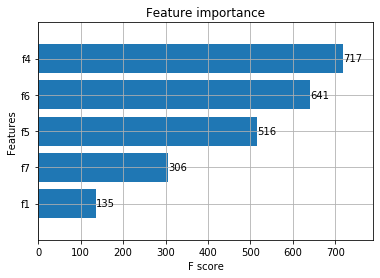

In [44]:
xgb.plot_importance(xgb_cv.best_estimator_, height=0.8, max_num_features=5);

In [45]:
xgb_cv.score(X_train, y_train), xgb_cv.score(X_test,y_test)

(-0.32467082193835056, -0.4943979662845495)

In [46]:
# print(classification_report(y_test, y_pred_xgb))
print(accuracy_score(y_test, y_pred_xgb))

0.7692644483362522


In [47]:
0.7688266199649737 # con 1500 en TF-IDF  45 min de train

0.7688266199649737

In [52]:
xgb_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eta=0.05, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=27,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [53]:
# copio los mejores parametros y vuelvo a entrenar el modelo
model_xgboost = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                                  colsample_bynode=1, colsample_bytree=0.3, eta=0.05, gamma=0.3,
                                  learning_rate=0.1, max_delta_step=0, max_depth=20,
                                  min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
                                  nthread=None, objective='binary:logistic', random_state=27,
                                  reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
                                  silent=None, subsample=1, verbosity=1)

In [54]:
y_xgboost = model_xgboost.fit(X_train,y_train).predict(X_test)

In [57]:
model_xgboost.score(X_train, y_train)

0.8977294051416776

In [58]:
accuracy_score(y_test, y_xgboost)

0.7692644483362522